In [2]:
%matplotlib widget

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import sys
sys.path.append('/mnt/g/My Drive/STUDY/CondMatt2/final project/code')
from DynmcsSolver import DynmcsSolver
import matplotlib.pyplot as plt
from scipy import ndimage
from copy import deepcopy

from pyUtils import MyJupyter, MyGeneral

In [4]:
k = -1
D = 1e-2
u1 = -1
u2 = 0
u3 = 1

u_in = u3
u_out = u1

In [5]:
l = 200
R = 30
dr = 2

xx = np.arange(-l/2, l/2, dr)
X, Y = np.meshgrid(xx,xx)


In [6]:

#  define time scale
# dt = 0.2*dr**2
# dt = 0.04*dr**2
dt = 1e-5
# dt = dr**2
# Nsteps = int(5e4)
# Nsteps = int(5e2)
Nsteps = int(5e3)


In [7]:
#--- simple circle
# # # create initial condition
# # R = 10
# Z = (X**2 + Y**2)
# Z[Z < R**2] = u_in
# Z[Z >= R**2] = u_out
# Z = ndimage.gaussian_filter(Z, sigma=2)

#--- two circles
# # create initial condition
R1 = 30
R2 = 15
# Z1 = ((X-20)**2 + (Y-20)**2)
# Z2 = ((X+40)**2 + (Y+40)**2)
Z1 = ((X)**2 + (Y)**2)
Z2 = ((X+30)**2 + (Y+30)**2)
Z_logic = (Z1 < R1**2) | (Z2 < R2**2)
Z = np.empty(Z_logic.shape).astype(float)
Z[Z_logic] = u_in
Z[~Z_logic] = u_out
Z = ndimage.gaussian_filter(Z, sigma=0.5)

In [8]:
# n = xx.size
# x, h = np.linspace(0, 1, n, endpoint=False, retstep=True)
# Z = 2*np.random.rand(n, n) - 1

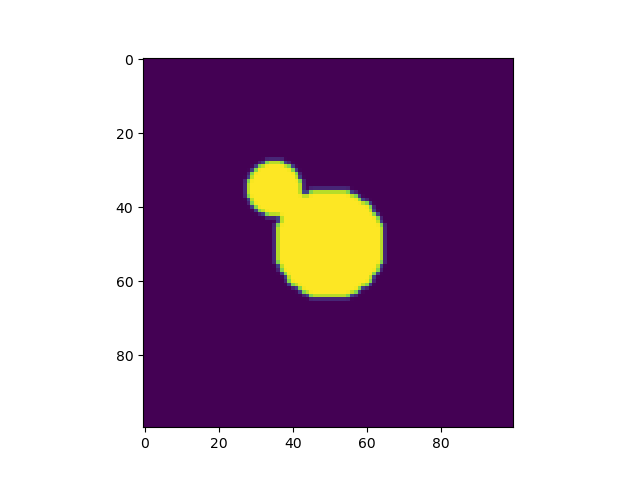

In [9]:
plt.figure()
plt.imshow(Z)

In [10]:
init_cond = deepcopy(Z)

# k = -0.2
# u1 = -1
# u2 = 0
# u3 = 1
# polynom = lambda u: k*(u-u1)*(u-u2)*(u-u3)
polynom = lambda u: u**3-u
# polynom = lambda x: x*(1-x**2)
# D = 1
# equation_name = 'CH'
equation_name = 'GL'

solver = DynmcsSolver(Z, dt, Nsteps, polynom, D, equation_name)

In [11]:
# import ipdb; ipdb.set_trace()

# solver.solve()
solver.solver_rungekutta()

100%|██████████| 4999/4999 [00:44<00:00, 113.36it/s]


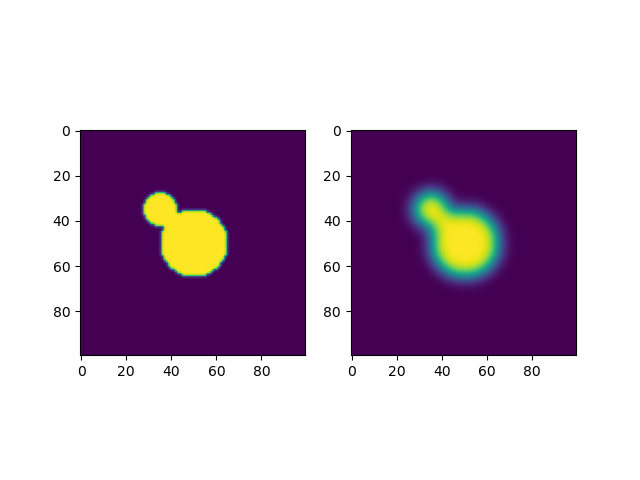

In [12]:
F,A = plt.subplots(1,2)
A[0].imshow(solver.results_array[0])
A[1].imshow(solver.results_array[-1])

In [13]:
np.max(np.abs(solver.results_array[0] - solver.results_array[-1]))

1.0808530438381956

In [14]:
# import matplotlib.animation as animation

# fig = plt.figure()


# def f(n):
#     return solver.results_array[n]

# n=0
# im = plt.imshow(f(n), animated=True)


# def updatefig(*args):
#     global n
#     n += 1
#     im.set_array(f(n))
#     return im,

# ani = animation.FuncAnimation(fig, updatefig, interval=1, blit=True)
# plt.show()

In [15]:
from pyUtils import MySignal

In [16]:
array4img = deepcopy(solver.results_array)
array4img[array4img>1] = 1
array4img[array4img<-1] = -1
array4img -= array4img.min(axis=(1,2))[:,None,None]
array4img /= array4img.max(axis=(1,2))[:,None,None]


In [17]:
from matplotlib import cm
from PIL import Image
# ims = [Image.fromarray(np.uint8(cm.gist_earth(I)*255)) for I in array4img]
ims = [Image.fromarray(np.uint8(cm.gist_earth(I)*255)) for I in solver.results_array]
ims[0].save("array.gif", save_all=True, append_images=ims[1:], duration=50, loop=0)

In [ ]:
# from PIL import Image

# # imgs = np.random.randint(0, 255, (100, 50, 50, 3), dtype=np.uint8)
# imgs = [Image.fromarray(img) for img in solver.results_array]
# # duration is the number of milliseconds between frames; this is 40 frames per second
# imgs[0].save("array.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)